---
title: LAB 8 Cannabis Types
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

# The Data

Importing the data from kaggle.  https://www.kaggle.com/datasets/kingburrito666/cannabis-strains

Consists of user reviews of different strains of cannabis.

Cleaned data can be found at: https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv

In [1]:
# Importing necessary libraries
import pandas as pd
import os
from plotnine import *  # noqa: F403
# Setting the working directory
os.chdir("/Users/alexad/Desktop/Positron Class Week 0")
# Reading in the excel file
df = pd.read_csv('cannabis_full.csv')
df.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part One: Binary Classification**

In [2]:

# Filtering the data to only sativa and indica strains
filtered_df = df[df['Type'].isin(['sativa', 'indica'])].copy()
# Removing NAs
filtered_df = filtered_df.dropna()
# Viewing the results
filtered_df.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Q1: LDA**

In [3]:

# Creating the X and y variables

# Making Type Binary
filtered_df['BinaryType'] = (filtered_df['Type'] == 'sativa').astype(int)
# Defining predictors and target variable
X = filtered_df.drop(columns=['Strain', 'Type', 'Effects', 'Flavor', 'BinaryType'])
y = filtered_df['BinaryType']

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Creating an LDA model
lda_model = Pipeline(
  [("standardize", StandardScaler()),
   ("lda", LinearDiscriminantAnalysis())]
)
# Fitting the model
lda_model_fitted = lda_model.fit(X, y)

lda_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [5]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')
print("Mean CV accuracy for LDA Model:", cv_scores.mean())

Mean CV accuracy for LDA Model: 0.8595410469044799


I chose to use the accuracy as a metric for the LDA model because there is no specific target category in this scenario, so I want to use accuracy to just gauge the proportion of correct predictions overall. 

LDA does not have any hyperparameters to tune, so I did not use any tuning for this model.

In [6]:
# Making the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(lda_model, X, y, cv=5)

# Confusion matrix
cm = confusion_matrix(y, y_pred_cv)
cm


array([[597,  62],
       [ 88, 321]])

In [7]:
# Making a more detailed confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=['Actual_indica', 'Actual_sativa'],
    columns=['Predicted_indica', 'Predicted_sativa']
)
cm_df

,Predicted_indica,Predicted_sativa
Actual_indica,597,62
Actual_sativa,88,321


### **Q2: QDA**

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
# Creating a QDA model
qda_model = Pipeline(
  [("standardize", StandardScaler()),
   ("qda", QuadraticDiscriminantAnalysis())]
)
# Tuning the hyperparameter
param_grid = {
    "qda__reg_param": [0.0, 0.2, 0.4, 0.8, 1.0]

}
qda_grid = GridSearchCV(qda_model, param_grid=param_grid, cv=5, scoring='accuracy')
qda_grid.fit(X, y)

bestqda_model = qda_grid.best_estimator_
best_qda_model = bestqda_model.named_steps["qda"]

best_qda_model

/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_ana

QuadraticDiscriminantAnalysis(reg_param=1.0)

In [9]:
# Finding the best tuning of parameters to build the best model
("Best reg_param:", qda_grid.best_params_['qda__reg_param'])

('Best reg_param:', 1.0)

In [10]:
# Finding the cross-validated accuracy score for the best QDA model
from sklearn.model_selection import cross_val_score
qdacv_scores = cross_val_score(bestqda_model, X, y, cv=5, scoring='accuracy')
print("Mean CV accuracy for QDA Model:", qdacv_scores.mean())

Mean CV accuracy for QDA Model: 0.8642490456759248


I chose to use the accuracy as a metric for the QDA model because there is no specific target category in this scenario, so I want to use accuracy to just gauge the proportion of correct predictions overall. 

In [11]:
# Making the confusion matrix for QDA model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(bestqda_model, X, y, cv=5)

# Confusion matrix
cm = confusion_matrix(y, y_pred_cv)
cm

array([[594,  65],
       [ 80, 329]])

In [12]:
# Making a more detailed confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=['Actual_indica', 'Actual_sativa'],
    columns=['Predicted_indica', 'Predicted_sativa']
)
cm_df

,Predicted_indica,Predicted_sativa
Actual_indica,594,65
Actual_sativa,80,329


### **Q3: SVC**

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning regularization parameter C
param_grid = {'svc__C': [0.1, 1, 10]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)
# Using the accuracy metric
svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='accuracy')
svc_pipeline_grid.fit(X, y)

# Best fitted pipeline and the SVC inside it
svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]


# Fitting data to the best model
svc_pipeline_best.fit(X, y)

Pipeline(steps=[('standardize', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', probability=True))])

In [14]:
# Finding the cross-validated accuracy score for the best SVC model
from sklearn.model_selection import cross_val_score
svccv_scores = cross_val_score(svc_pipeline_best, X, y, cv=5, scoring='accuracy')
print("Mean CV accuracy for SVC Model:", svccv_scores.mean())

Mean CV accuracy for SVC Model: 0.8586196305559213


I chose to use the accuracy as a metric for the SVC model because there is no specific target category in this scenario, so I want to use accuracy to just gauge the proportion of correct predictions overall. 

In [15]:
# Making the confusion matrix for SVC model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(svc_pipeline_best, X, y, cv=5)

# Confusion matrix
cm = confusion_matrix(y, y_pred_cv)
cm

array([[591,  68],
       [ 83, 326]])

In [16]:
# Making a more detailed confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=['Actual_indica', 'Actual_sativa'],
    columns=['Predicted_indica', 'Predicted_sativa']
)
cm_df

,Predicted_indica,Predicted_sativa
Actual_indica,591,68
Actual_sativa,83,326


### **Q4: SVM**

In [17]:
# Creating the SVM pipeline
svm_poly_pipeline = Pipeline(
  [("standardize", StandardScaler()),
   ("svm", SVC(kernel="poly"))]
)

# Creating the hyperparameter tuning
param_grid_svm_poly = {
    "svm__C": [0.1, 1, 10],
    "svm__degree": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
# Making the gridsearch for the tuning
svm_poly_grid = GridSearchCV(svm_poly_pipeline, param_grid=param_grid_svm_poly, cv=5, scoring='accuracy')
svm_poly_grid.fit(X, y)

# Getting the best pipeline and best inner SVM model
svm_poly_best = svm_poly_grid.best_estimator_
svm_poly_best_inner = svm_poly_best.named_steps["svm"]

# Fitting to the best model
svm_poly_best.fit(X, y)


Pipeline(steps=[('standardize', StandardScaler()),
                ('svm', SVC(C=10, degree=1, kernel='poly'))])

In [18]:
# Finding the cross-validated accuracy score for the best SVM model
from sklearn.model_selection import cross_val_score
svmcv_scores = cross_val_score(svm_poly_best, X, y, cv=5, scoring='accuracy')
print("Mean CV accuracy for SVM Model:", svmcv_scores.mean())

Mean CV accuracy for SVM Model: 0.8576806634197711


I chose to use the accuracy as a metric for the SVM model because there is no specific target category in this scenario, so I want to use accuracy to just gauge the proportion of correct predictions overall. 

In [19]:
# Making the confusion matrix for SVM model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(svm_poly_best, X, y, cv=5)

# Confusion matrix
cm = confusion_matrix(y, y_pred_cv)
cm

array([[590,  69],
       [ 83, 326]])

In [20]:
# Making a more detailed confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=['Actual_indica', 'Actual_sativa'],
    columns=['Predicted_indica', 'Predicted_sativa']
)
cm_df

,Predicted_indica,Predicted_sativa
Actual_indica,590,69
Actual_sativa,83,326


# **Part Two: Natural Multiclass**

In [21]:
# Using the full dataset
df_full = df.copy()
# Dropping the NAs
df_full = df_full.dropna()

# Creating the predictors and target variable
X = df_full.drop(columns=['Strain', 'Type', 'Effects', 'Flavor'])
y = df_full['Type']

### **Q1: Decision tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decisison tree model
dt_model =Pipeline(
    [("scale", StandardScaler()),
    ("dt", DecisionTreeClassifier())]
)

param_grid = {
    "dt__max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

tree_grid = GridSearchCV(dt_model, param_grid = param_grid, cv=5, scoring="accuracy")

tree_grid.fit(X, y)

# Getting the best model
best_pipeline = tree_grid.best_estimator_
best_pipeline

Pipeline(steps=[('scale', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=3))])

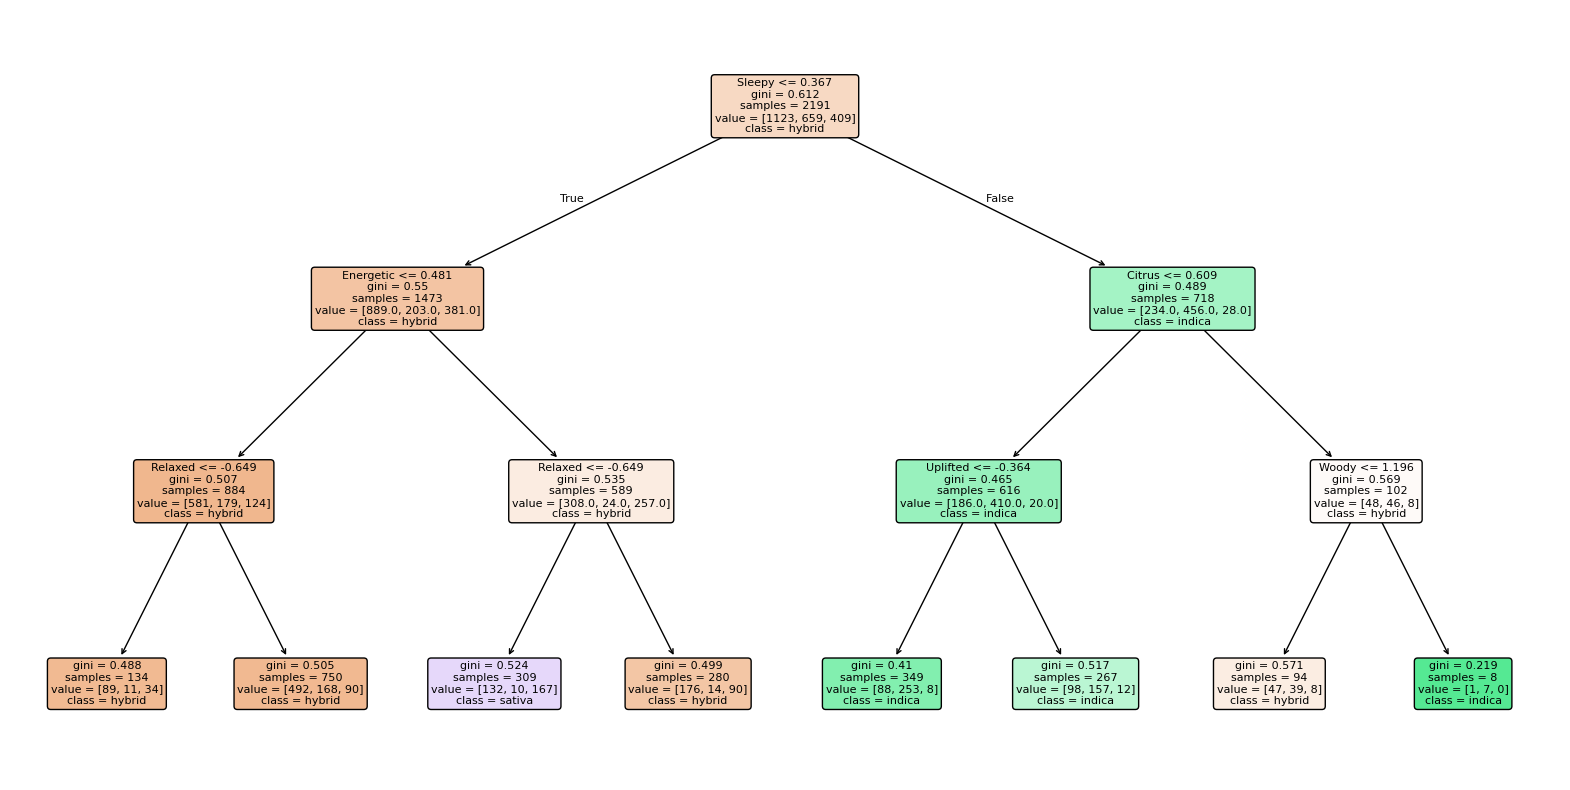

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Finding the best pipeline from grid search
best_pipeline = tree_grid.best_estimator_

# Getting the DecisionTreeClassifier from the "dt" step
best_tree = best_pipeline.named_steps["dt"]

plt.figure(figsize=(20,10))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=sorted(y.unique()),
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()


The decision tree uses Sleepy as the root split, which indicates that this is teh most important predictor for identifying indica, sativa, and hybrid strains in this dataset. One of the next splits is Energetic, which leads options to either hyrbid or sativa classes. The other split, citrus, leads to the indica or hyrbid classes.

### **Q2: Repeat the analyses from part one for LDA, QDA, and KNN**

#### **LDA**

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Creating an LDA model
lda_model = Pipeline(
  [("standardize", StandardScaler()),
   ("lda", LinearDiscriminantAnalysis())]
)
# Fitting the model
lda_model_fitted = lda_model.fit(X, y)

lda_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [25]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')
print("Mean CV accuracy for LDA Model:", cv_scores.mean())

Mean CV accuracy for LDA Model: 0.6280244640683995


I chose to use the accuracy as a metric for the decision tree model because there is no specific target category in this scenario, so I want to use accuracy to just gauge the proportion of correct predictions overall. 

In [26]:
# Making the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(lda_model, X, y, cv=5)

# Confusion matrix
labels = ['indica', 'sativa', 'hybrid']
cm = confusion_matrix(y, y_pred_cv, labels=labels)
cm

array([[451,  13, 195],
       [ 21, 175, 213],
       [222, 151, 750]])

In [27]:
# Making a more detailed confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=['Actual_indica', 'Actual_sativa', 'Actual_hybrid'],
    columns=['Predicted_indica', 'Predicted_sativa', 'Predicted_hybrid']
)
cm_df

,Predicted_indica,Predicted_sativa,Predicted_hybrid
Actual_indica,451,13,195
Actual_sativa,21,175,213
Actual_hybrid,222,151,750


#### **QDA**

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
# Creating a QDA model
qda_model = Pipeline(
  [("standardize", StandardScaler()),
   ("qda", QuadraticDiscriminantAnalysis())]
)
# Tuning the hyperparameter
param_grid = {
    "qda__reg_param": [0.0, 0.2, 0.4, 0.8, 1.0]

}
qda_grid = GridSearchCV(qda_model, param_grid=param_grid, cv=5, scoring='accuracy')
qda_grid.fit(X, y)

bestqda_model = qda_grid.best_estimator_
best_qda_model = bestqda_model.named_steps["qda"]

best_qda_model

/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_ana

QuadraticDiscriminantAnalysis(reg_param=1.0)

In [29]:
# Finding the best tuning of parameters to build the best model
("Best reg_param:", qda_grid.best_params_['qda__reg_param'])

('Best reg_param:', 1.0)

In [30]:
# Finding the cross-validated accuracy score for the best QDA model
from sklearn.model_selection import cross_val_score
qdacv_scores = cross_val_score(bestqda_model, X, y, cv=5, scoring='accuracy')
print("Mean CV accuracy for QDA Model:", qdacv_scores.mean())

Mean CV accuracy for QDA Model: 0.619354905815417


I chose to use the accuracy as a metric for the LDA model because there is no specific target category in this scenario, so I want to use accuracy to just gauge the proportion of correct predictions overall. 

In [31]:
# Making the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(bestqda_model, X, y, cv=5)

# Confusion matrix
labels = ['indica', 'sativa', 'hybrid']
cm = confusion_matrix(y, y_pred_cv, labels=labels)
cm

array([[454,  16, 189],
       [ 16, 207, 186],
       [235, 192, 696]])

In [32]:
# Making a more detailed confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=['Actual_indica', 'Actual_sativa', 'Actual_hybrid'],
    columns=['Predicted_indica', 'Predicted_sativa', 'Predicted_hybrid']
)
cm_df

,Predicted_indica,Predicted_sativa,Predicted_hybrid
Actual_indica,454,16,189
Actual_sativa,16,207,186
Actual_hybrid,235,192,696


#### **KNN**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
# Making the KNN pipeline
knn_model = Pipeline(
    [("standardize", StandardScaler()),
    ("knn", KNeighborsClassifier())]
)

# Tuning K for the number of nearest neighbors 
param_grid_knn = {
    "knn__n_neighbors": [1, 2, 4, 8, 10, 20]
}

knn_grid = GridSearchCV(knn_model, param_grid=param_grid_knn, cv=5, scoring="accuracy")

knn_grid.fit(X, y)
# Getting the best estimator
best_knn = knn_grid.best_estimator_

In [34]:
# Finding the cross-validated accuracy score for the best KNN model
from sklearn.model_selection import cross_val_score
knncv_scores = cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')
print("Mean CV accuracy for QDA Model:", knncv_scores.mean())

Mean CV accuracy for QDA Model: 0.5645988704090866


In [35]:
# Making a confusion matrix for KNN
labels = ['indica', 'sativa', 'hybrid']
y_pred_knn = cross_val_predict(best_knn, X, y, cv=5)
cm_knn = confusion_matrix(y, y_pred_knn, labels=labels)

cm_knn_df = pd.DataFrame(
    cm_knn,
    index=['Actual_indica', 'Actual_sativa', 'Actual_hybrid'],
    columns=['Predicted_indica', 'Predicted_sativa', 'Predicted_hybrid']
)
cm_knn_df

,Predicted_indica,Predicted_sativa,Predicted_hybrid
Actual_indica,311,8,340
Actual_sativa,20,51,338
Actual_hybrid,204,44,875


### **Q3: Comparison**

**Were the metrics better or worse than in Part One? Why?**

The metrics were bettwer in part one. we see that for every model, the accuracy rate went down in part two. This is because the binary classification was more accurate than the multiclass classification models. In part one, the only choices were indica or sativa, but in part two, we included the hybrid strain, which creates some overlap, making it harder to classify with perfect accuracy.

**Which categories were most likely to get mixed up, according to the confusion matrices? Why?**

According to the confusion matrices, it seems that the hybrid class was most frequently misclassified and therefore, most likely to get mixed up. This is seen by the fact that the hybrid class consistently had the highest number of incorrect predictions. This may be because hybrids are a mix of the indica and sativa, so they carry traits that might be found in either one of those, making it harder for the model to predict perfectly. 

# **Part Three: Multiclass from Binary**

### **Q1**

In [36]:
X = df_full.drop(columns=['Strain', 'Type', 'Effects', 'Flavor'])
y = df_full['Type']   # 'indica', 'sativa', 'hybrid'

### **Indica vs. Not Indica Models**

**SVC MODEL Indica vs. Not Indica**

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd


In [38]:
# Making variable where indica =1 and otherwise = 0
y_indica = (y == "indica").astype(int)

In [39]:
svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear"))]
)

# Fitting data to the best model
svc_pipeline.fit(X, y_indica)

Pipeline(steps=[('standardize', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [40]:
# Finding the cross-validated accuracy score for the best SVC model
from sklearn.model_selection import cross_val_score
svcindicacv_scores = cross_val_score(svc_pipeline, X, y_indica, cv=5, scoring='accuracy')
print("Mean CV accuracy for SVC Model:", svcindicacv_scores.mean())

Mean CV accuracy for SVC Model: 0.7891461499256301


In [41]:
# Making the confusion matrix for SVC model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(svc_pipeline, X, y_indica, cv=5)

# Confusion matrix
cm = confusion_matrix(y_indica, y_pred_cv)
cm

array([[1278,  254],
       [ 208,  451]])

**Logistic MODEL Indica vs. Not Indica**

In [42]:
# Making variable where indica =1 and otherwise = 0
y_indica = (y == "indica").astype(int)

In [43]:
from sklearn.linear_model import LogisticRegression

# Creating the pipeline
logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression(max_iter=1000))]
)
# Fitting the model on the whole dataset
logistic_model_fitted = logistic_model.fit(X, y_indica)
# Printing the fitted model
logistic_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [44]:
# Finding the cross-validated accuracy score for the logit model

logitindicacv_scores = cross_val_score(logistic_model, X, y_indica, cv=5, scoring='accuracy')
print("Mean CV accuracy for logistic Model:", logitindicacv_scores.mean())

Mean CV accuracy for logistic Model: 0.7868640850417615


In [45]:
# Making the confusion matrix for logit model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(logistic_model, X, y_indica, cv=5)

# Confusion matrix
cm = confusion_matrix(y_indica, y_pred_cv)
cm

array([[1319,  213],
       [ 254,  405]])

### **Sativa vs. Not Sativa Models**

**SVC MODEL Sativa vs. Not Sativa**

In [46]:
# Making variable where sativa =1 and otherwise = 0
y_sativa = (y == "sativa").astype(int)

In [47]:


svc_pipeline2 = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear"))]
)



# Fitting data to the best model
svc_pipeline2.fit(X, y_sativa)

Pipeline(steps=[('standardize', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [48]:
# Finding the cross-validated accuracy score for the best SVC model
from sklearn.model_selection import cross_val_score
svcsativacv_scores = cross_val_score(svc_pipeline2, X, y_sativa, cv=5, scoring='accuracy')
print("Mean CV accuracy for SVC Model:", svcsativacv_scores.mean())

Mean CV accuracy for SVC Model: 0.8215443983316171


In [49]:
# Making the confusion matrix for SVC model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(svc_pipeline2, X, y_sativa, cv=5)

# Confusion matrix
cm = confusion_matrix(y_sativa, y_pred_cv)
cm

array([[1717,   65],
       [ 326,   83]])

**Logistic MODEL Indica vs. Not Indica**

In [50]:
# Making variable where sativa =1 and otherwise = 0
y_sativa = (y == "sativa").astype(int)

In [51]:
from sklearn.linear_model import LogisticRegression

# Creating the pipeline
logistic_model2 = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression(max_iter=1000))]
)
# Fitting the model on the whole dataset
logistic_model_fitted = logistic_model2.fit(X, y_sativa)
# Printing the fitted model
logistic_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [52]:
# Finding the cross-validated accuracy score for the logit model

logitsativacv_scores = cross_val_score(logistic_model2, X, y_sativa, cv=5, scoring='accuracy')
print("Mean CV accuracy for logistic Model:", logitsativacv_scores.mean())

Mean CV accuracy for logistic Model: 0.8229142613453156


In [53]:
# Making the confusion matrix for logit model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(logistic_model2, X, y_sativa, cv=5)

# Confusion matrix
cm = confusion_matrix(y_sativa, y_pred_cv)
cm

array([[1672,  110],
       [ 278,  131]])

### **Hybrid vs. Not Hyrbrid Models**

**SVC MODEL Hybrid vs. Not Hybrid**

In [54]:
# Making variable where hybrid =1 and otherwise = 0
y_hybrid = (y == "hybrid").astype(int)

In [55]:

svc_pipeline3 = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear"))]
)

# Fitting data to the best model
svc_pipeline3.fit(X, y_hybrid)

Pipeline(steps=[('standardize', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [56]:
# Finding the cross-validated accuracy score for the best SVC model
from sklearn.model_selection import cross_val_score
svchybridcv_scores = cross_val_score(svc_pipeline3, X, y_hybrid, cv=5, scoring='accuracy')
print("Mean CV accuracy for SVC Model:", svchybridcv_scores.mean())

Mean CV accuracy for SVC Model: 0.6202587865738863


In [57]:
# Making the confusion matrix for SVC model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(svc_pipeline3, X, y_hybrid, cv=5)

# Confusion matrix
cm = confusion_matrix(y_hybrid, y_pred_cv)
cm

array([[508, 560],
       [272, 851]])

**Logistic MODEL Hybrid vs. Not Hybrid**

In [58]:
# Making variable where hybrid =1 and otherwise = 0
y_hybrid = (y == "hybrid").astype(int)

In [59]:
from sklearn.linear_model import LogisticRegression

# Creating the pipeline
logistic_model3 = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression(max_iter=1000))]
)
# Fitting the model on the whole dataset
logistic_model_fitted = logistic_model3.fit(X, y_hybrid)
# Printing the fitted model
logistic_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [60]:
# Finding the cross-validated accuracy score for the logit model

logithybridcv_scores = cross_val_score(logistic_model3, X, y_hybrid, cv=5, scoring='accuracy')
print("Mean CV accuracy for logistic Model:", logithybridcv_scores.mean())

Mean CV accuracy for logistic Model: 0.6156967370840745


In [61]:
# Making the confusion matrix for logit model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Finding the cross-validated predictions for each row
y_pred_cv = cross_val_predict(logistic_model3, X, y_hybrid, cv=5)

# Confusion matrix
cm = confusion_matrix(y_hybrid, y_pred_cv)
cm

array([[610, 458],
       [384, 739]])

### **Q2**

In [62]:
results_ovr = {
    "SVC_Indica_vs_NotIndica": svcindicacv_scores.mean(),
    "SVC_Sativa_vs_NotSativa": svcsativacv_scores.mean(),
    "SVC_Hybrid_vs_NotHybrid": svchybridcv_scores.mean(),
    
    "Logit_Indica_vs_NotIndica": logitindicacv_scores.mean(),
    "Logit_Sativa_vs_NotSativa": logitsativacv_scores.mean(),
    "Logit_Hybrid_vs_NotHybrid": logithybridcv_scores.mean()
}


In [63]:
ovr_df = pd.DataFrame.from_dict(results_ovr, orient='index', columns=['Mean_CV_Accuracy'])
ovr_df


,Mean_CV_Accuracy
SVC_Indica_vs_NotIndica,0.789146
SVC_Sativa_vs_NotSativa,0.821544
SVC_Hybrid_vs_NotHybrid,0.620259
Logit_Indica_vs_NotIndica,0.786864
Logit_Sativa_vs_NotSativa,0.822914
Logit_Hybrid_vs_NotHybrid,0.615697


The model with the highest accuracy is the logistic model for sativa versus not sativa. Followed by SVC sativa versus not sativa, SVC Indica versus not indica, and logit indica versus not indica. The two lowest are logit hybrid versus not hybrid (the worst) nd SVC hybrid versus hybrid.

This makes intuitive sense because the models are still consistenly better at predicting for indica and sativa, instead of hybrids. This is because hybrids contain characteristics of both, making it more difficult to accurately predict them. 

### **Q3**

Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

Indica vs. Sativa

Indica vs. Hybrid

Hybrid vs. Sativa

**indica vs sativa svc**

In [64]:
# Making only indica and sativa
filtered_df = df[df['Type'].isin(['sativa', 'indica'])].copy()
filtered_df = filtered_df.dropna()

# Making predictors and target 
X_is = filtered_df.drop(columns=['Strain', 'Type', 'Effects', 'Flavor'])
y_is = filtered_df['Type']           


In [65]:
# Making it binary
y_is_bin = (y_is == "sativa").astype(int)

In [66]:

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
   ("svc", SVC(kernel="linear"))]   
)

svc_pipeline.fit(X_is, y_is_bin)

Pipeline(steps=[('standardize', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [67]:
from sklearn.model_selection import cross_val_score

svccv_scores = cross_val_score(svc_pipeline, X_is, y_is_bin, cv=5, scoring='accuracy')
print("Mean CV accuracy for SVC (Indica vs Sativa):", svccv_scores.mean())


Mean CV accuracy for SVC (Indica vs Sativa): 0.8576806634197711


In [69]:

# Cross-validating predictions
y_pred_cv = cross_val_predict(svc_pipeline, X_is, y_is_bin, cv=5)

# Confusion matrix (binary)
cm = confusion_matrix(y_is_bin, y_pred_cv)

cm_df = pd.DataFrame(cm, index=['Actual_indica', 'Actual_sativa'], columns=['Predicted_indica', 'Predicted_sativa'])

cm_df


,Predicted_indica,Predicted_sativa
Actual_indica,592,67
Actual_sativa,85,324


**indica vs sativa logit**

In [70]:
# Making the pipeline
logit_is = Pipeline(
    [("standardize", StandardScaler()),
     ("logit", LogisticRegression(max_iter=1000))]
)

# Cross-validated accuracy
logit_is_cv = cross_val_score(logit_is, X_is, y_is_bin, cv=5, scoring="accuracy")
print("Mean CV accuracy for Logistic Regression (Indica vs Sativa):", logit_is_cv.mean())

Mean CV accuracy for Logistic Regression (Indica vs Sativa): 0.8511298319512088


In [71]:
# Cross-validated predictions
y_pred_logit = cross_val_predict(logit_is, X_is, y_is_bin, cv=5)

# Confusion matrix
cm_logit = confusion_matrix(y_is_bin, y_pred_logit)

cm_logit_df = pd.DataFrame(
    cm_logit,
    index=['Actual_indica', 'Actual_sativa'],
    columns=['Predicted_indica', 'Predicted_sativa']
)

cm_logit_df

,Predicted_indica,Predicted_sativa
Actual_indica,591,68
Actual_sativa,91,318


**indica vs hybrid**

In [72]:
# Getting only indica and hybrid rows
filtered_df_ih = df[df['Type'].isin(['indica', 'hybrid'])].copy()
filtered_df_ih = filtered_df_ih.dropna()

# Making predictors and target
X_ih = filtered_df_ih.drop(columns=['Strain', 'Type', 'Effects', 'Flavor'])
y_ih = filtered_df_ih['Type']


In [73]:
# Making it binary
y_ih_bin = (y_ih == "hybrid").astype(int)

In [75]:
# Makingthe svc pipeline
svc_ih = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC(kernel="linear"))
])
# Cross validating
svc_ih_cv = cross_val_score(svc_ih, X_ih, y_ih_bin, cv=5, scoring="accuracy")
print("SVC Indica vs Hybrid — Mean CV Accuracy:", svc_ih_cv.mean())

SVC Indica vs Hybrid — Mean CV Accuracy: 0.7575834828313347


In [76]:
# Making the confusion matrix
y_pred_ih_svc = cross_val_predict(svc_ih, X_ih, y_ih_bin, cv=5)

cm_ih_svc = confusion_matrix(y_ih_bin, y_pred_ih_svc)

cm_ih_svc_df = pd.DataFrame(
    cm_ih_svc,
    index=["Actual_indica", "Actual_hybrid"],
    columns=["Predicted_indica", "Predicted_hybrid"]
)

cm_ih_svc_df

,Predicted_indica,Predicted_hybrid
Actual_indica,455,204
Actual_hybrid,228,895


**logit indica and hybrid**

In [77]:
# Making the pipeline
logit_ih = Pipeline([
    ("scale", StandardScaler()),
    ("logit", LogisticRegression(max_iter=1000))
])
# Checking for accuracy
logit_ih_cv = cross_val_score(logit_ih, X_ih, y_ih_bin, cv=5, scoring="accuracy")
print("Logistic Regression Indica vs Hybrid — Mean CV Accuracy:", logit_ih_cv.mean())

Logistic Regression Indica vs Hybrid — Mean CV Accuracy: 0.7457920246750386


In [78]:
# Making the confusion matrix
y_pred_ih_logit = cross_val_predict(logit_ih, X_ih, y_ih_bin, cv=5)

cm_ih_logit = confusion_matrix(y_ih_bin, y_pred_ih_logit)

cm_ih_logit_df = pd.DataFrame(
    cm_ih_logit,
    index=["Actual_indica", "Actual_hybrid"],
    columns=["Predicted_indica", "Predicted_hybrid"]
)

cm_ih_logit_df


,Predicted_indica,Predicted_hybrid
Actual_indica,419,240
Actual_hybrid,213,910


**SVC for hybrid versus sativa**

In [79]:
# Making only hybrid and sativa strains
filtered_df_hs = df[df['Type'].isin(['hybrid', 'sativa'])].copy()
filtered_df_hs = filtered_df_hs.dropna()

# Creating predictors and target
X_hs = filtered_df_hs.drop(columns=['Strain', 'Type', 'Effects', 'Flavor'])
y_hs = filtered_df_hs['Type']

# Making it binary
y_hs_bin = (y_hs == "sativa").astype(int)

In [80]:
# Making the pipeline
svc_hs = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC(kernel="linear"))
])
# Showing the accuracy
svc_hs_cv = cross_val_score(svc_hs, X_hs, y_hs_bin, cv=5, scoring="accuracy")
print("SVC Hybrid vs Sativa — Mean CV Accuracy:", svc_hs_cv.mean())


SVC Hybrid vs Sativa — Mean CV Accuracy: 0.7440952928402631


In [81]:
# Making the confusion matrix
y_pred_hs_svc = cross_val_predict(svc_hs, X_hs, y_hs_bin, cv=5)

cm_hs_svc = confusion_matrix(y_hs_bin, y_pred_hs_svc)

cm_hs_svc_df = pd.DataFrame(
    cm_hs_svc,
    index=["Actual_hybrid", "Actual_sativa"],
    columns=["Predicted_hybrid", "Predicted_sativa"]
)

cm_hs_svc_df


,Predicted_hybrid,Predicted_sativa
Actual_hybrid,1009,114
Actual_sativa,278,131


**logit for sativa versus hybrid**

In [82]:
# Makig the pipeline
logit_hs = Pipeline([
    ("scale", StandardScaler()),
    ("logit", LogisticRegression(max_iter=1000))
])

# finding the accuracy
logit_hs_cv = cross_val_score(logit_hs, X_hs, y_hs_bin, cv=5, scoring="accuracy")
print("Logistic Regression Hybrid vs Sativa — Mean CV Accuracy:", logit_hs_cv.mean())

Logistic Regression Hybrid vs Sativa — Mean CV Accuracy: 0.7447637904238785


In [83]:
# Making the confusion matrix
y_pred_hs_logit = cross_val_predict(logit_hs, X_hs, y_hs_bin, cv=5)

cm_hs_logit = confusion_matrix(y_hs_bin, y_pred_hs_logit)

cm_hs_logit_df = pd.DataFrame(
    cm_hs_logit,
    index=["Actual_hybrid", "Actual_sativa"],
    columns=["Predicted_hybrid", "Predicted_sativa"]
)

cm_hs_logit_df

,Predicted_hybrid,Predicted_sativa
Actual_hybrid,1004,119
Actual_sativa,272,137


### **Q4**

In [84]:
import pandas as pd

# Create a dictionary of model names → mean accuracies
ovo_results = {
    "SVC_Indica_vs_Sativa": svccv_scores.mean(),
    "SVC_Indica_vs_Hybrid": svc_ih_cv.mean(),
    "SVC_Hybrid_vs_Sativa": svc_hs_cv.mean(),
    
    "Logit_Indica_vs_Sativa": logit_is_cv.mean(),
    "Logit_Indica_vs_Hybrid": logit_ih_cv.mean(),
    "Logit_Hybrid_vs_Sativa": logit_hs_cv.mean()
}

# Convert to DataFrame
ovo_df = pd.DataFrame.from_dict(ovo_results, orient="index", columns=["Mean_CV_Accuracy"])

# Optional: Sort by accuracy (best to worst)
ovo_df_sorted = ovo_df.sort_values(by="Mean_CV_Accuracy", ascending=False)

ovo_df_sorted


,Mean_CV_Accuracy
SVC_Indica_vs_Sativa,0.857681
Logit_Indica_vs_Sativa,0.851130
SVC_Indica_vs_Hybrid,0.757583
Logit_Indica_vs_Hybrid,0.745792
Logit_Hybrid_vs_Sativa,0.744764
SVC_Hybrid_vs_Sativa,0.744095


The most accurate model is the SVC for indica and sativa, followed by the logit for indica and sativa with accuracies of 0.85. The worst model is SVC for hybrid and sativa at an accuracy of 0.74. This makes intuitive sesne and reinforces the idea that hybrids are still the most difficult to distinguish. This is due to the characteristics of hybrids. They have a combination of features found in both indica and sativa. 

### **Q5**

Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

Note: You do not actually have to run code here - you only need to look at sklearn’s documentation to see how these functions handle multiclass input.

If I had simply input the full data, with the three classes, it seems that the LogisticRegression function would have not automatically taken an ovo or ovr approach. It would have used a multinomial approach for multiclass classification, unless made a specification like "multi_class='ovr'. For SVC, the ovo approach is used for multiclass classification. 